In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/fabiobanyu/File_Tugas/refs/heads/main/Tantangan%20Mahasiswa%20Sains%20Data%20Itera%20Angkatan%202023%20dalam%20Penyelesaian%20Tugas%20Akhir%20Semester%20_%20Studi%20Kasus%20menggunakan%20metode%20Saturation%20Sampling%20(Responses)%20-%20Form%20Responses%201.csv"

data = pd.read_csv(url)
data.head()

,Nama,"Apa tantangan/masalah utama yang Anda hadapi dalam proses pengerjaan tugas akhir Semester? \n(petunjuk : bebas menuliskan lebih dari 1 jawaban, misal: Manajemen waktu, Kurangnya Kerjasama Kelompok, tidak paham materi dll)","Menurut Anda, seberapa sulit mengatasi tantangan tersebut dalam menyelesaikan tugas akhir ?"
0,Sania Dwi Ayu Lestari,"Manajemen waktu, Kurang Paham Materi, Kurangny...",3
1,Aprilia Dewi Hutapea,"Manajemen waktu, Kurangnya Kerjasama Kelompok \n",3
2,Khansa Anyaveda Liyantri,"Manajemen waktu, Kurang Paham Materi",3
3,Arienta Khusnul Ananda,Kurangnya Kerjasama Kelompok,3
4,Akeyla Fairuz Shafi,"Kurang Komunikasi, Manajemen waktu",3


In [22]:

challenges_column = data.iloc[:, 1]  # Assuming the second column contains the challenges

challenges_split = challenges_column.str.split(',').explode().str.strip()

challenges_count = challenges_split.value_counts()

challenges_df = challenges_count.reset_index()
challenges_df.columns = ['Keterangan', 'Jumlah']

challenges_df

,Keterangan,Jumlah
0,Manajemen waktu,22
1,Kurangnya Kerjasama Kelompok,11
2,Kurang Paham Materi,6
3,Kurang Komunikasi,1
4,Minimnya Petunjuk Pengerjaan,1


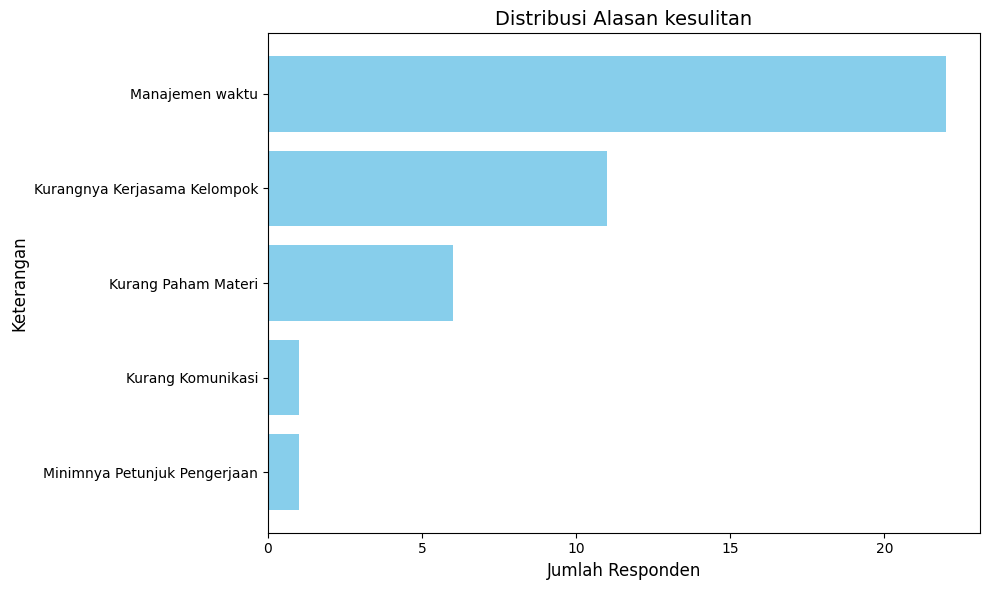

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(challenges_df['Keterangan'], challenges_df['Jumlah'], color='skyblue')
plt.xlabel('Jumlah Responden', fontsize=12)
plt.ylabel('Keterangan', fontsize=12)
plt.title('Distribusi Alasan kesulitan', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()

In [31]:
difficulty_column = data.iloc[:, 2]

difficulty_count = difficulty_column.value_counts().sort_index()

total_responses = difficulty_count.sum()
proportions = difficulty_count / total_responses

average_rating = (difficulty_count.to_numpy() * difficulty_count.values).sum() / total_responses

difficulty_df = pd.DataFrame({
    'Rating': difficulty_count.index,
    'Jumlah': difficulty_count.values,
    'Proporsi': proportions.values
})

print("Distribusi Kesulitan:")
print(difficulty_df)
print(f"Rata-rata rating kesulitan: {average_rating:.2f}\n")
print(difficulty_column.describe())

Distribusi Kesulitan:
   Rating  Jumlah  Proporsi
0       1       1  0.034483
1       2       3  0.103448
2       3      22  0.758621
3       4       3  0.103448
Rata-rata rating kesulitan: 17.34

count    29.000000
mean      2.931034
std       0.593479
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Menurut Anda, seberapa sulit mengatasi tantangan tersebut dalam  menyelesaikan tugas akhir ?, dtype: float64


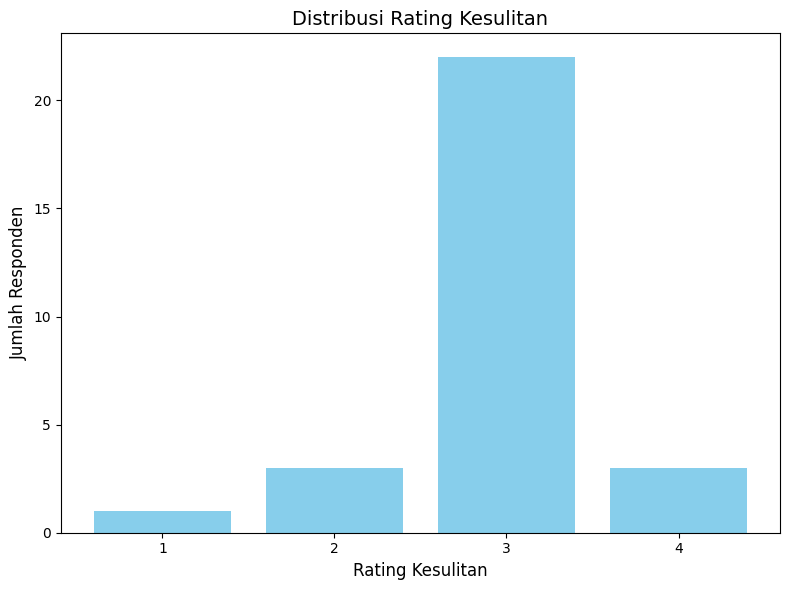

In [28]:
# Plotting the data as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(difficulty_df['Rating'], difficulty_df['Jumlah'], color='skyblue')
plt.xlabel('Rating Kesulitan', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.title('Distribusi Rating Kesulitan', fontsize=14)
plt.xticks(difficulty_df['Rating'], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

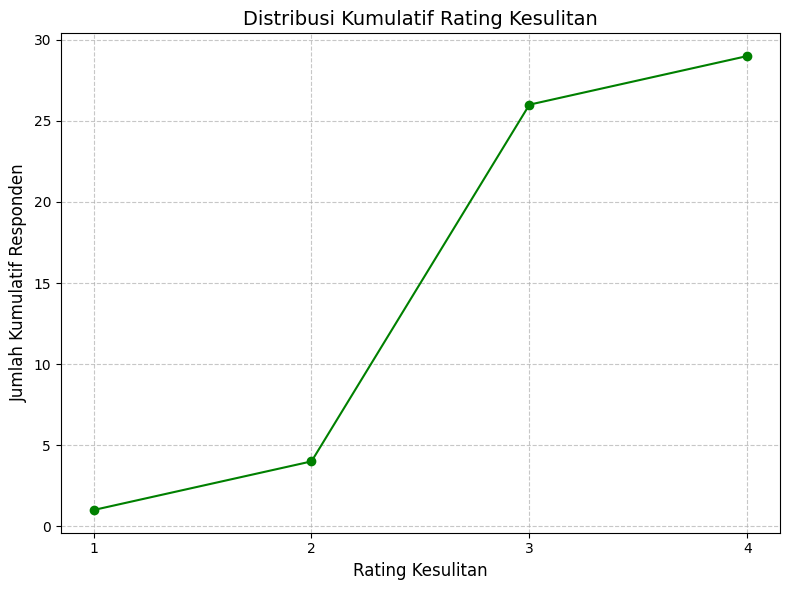

In [36]:
# Grafik kumulatif
plt.figure(figsize=(8, 6))

cumulative_count = difficulty_count.cumsum()

plt.plot(difficulty_count.index, cumulative_count, marker='o', linestyle='-', color='green')
plt.xlabel('Rating Kesulitan', fontsize=12)
plt.ylabel('Jumlah Kumulatif Responden', fontsize=12)
plt.title('Distribusi Kumulatif Rating Kesulitan', fontsize=14)
plt.xticks(difficulty_count.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
